# Support Vector Machines - SVM
## Laboratorio 3 - Diego Córdova: 20212
> En este archivo se realiza unicamente la exploracion de datos

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo ✓
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva ✓
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

##  Analisis Exploratorio

### Identifica el tipo de archivo .data y la forma de leerlo
El archivo es un csv separado por comas. Este puede leerse con el siguiente código.

In [3]:
# Imports
from sklearn.model_selection import train_test_split
from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
#from pandas_profiling import ProfileReport
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv 

In [4]:
data = pd.read_csv('./wine_fraud.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

In [5]:
# show quantitative and qualitative variables
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
data.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  type 
7.0            0.150             0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      Legit    white    8
7.3            0.190             0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      Legit    white    8
6.8            0.180             0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      Legit    white    7
7.4            0.160             0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      Legit    white    7
7.6            0.200             0.30         14.2            0.056      53.0                 212.5                 0.99900  3.14  0.46       8.9     

### Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

Variables numericas

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


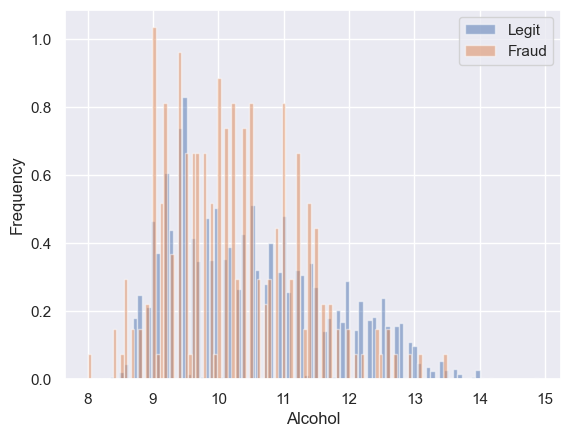

In [8]:
# Histograma que compara el nivel de alcohol de los vinos con el vino fraudulento y no fraudulento

legit = data[data['quality'] == 'Legit']
fraud = data[data['quality'] == 'Fraud']

plt.hist(legit['alcohol'], 100, density=True, alpha=0.5, label='Legit')
plt.hist(fraud['alcohol'], 100, density=True, alpha=0.5, label='Fraud')
plt.legend(loc='upper right')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()



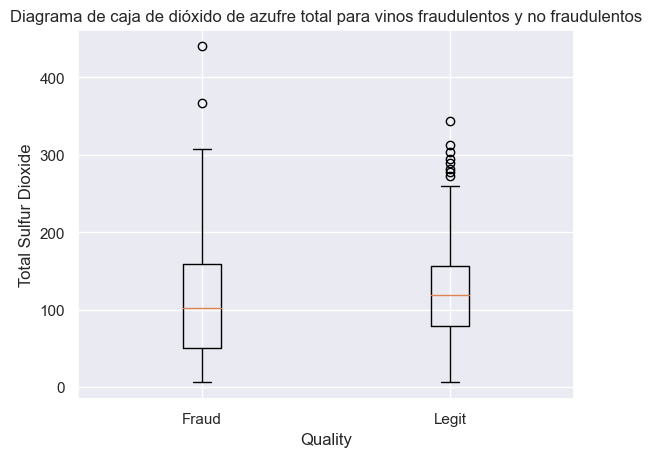

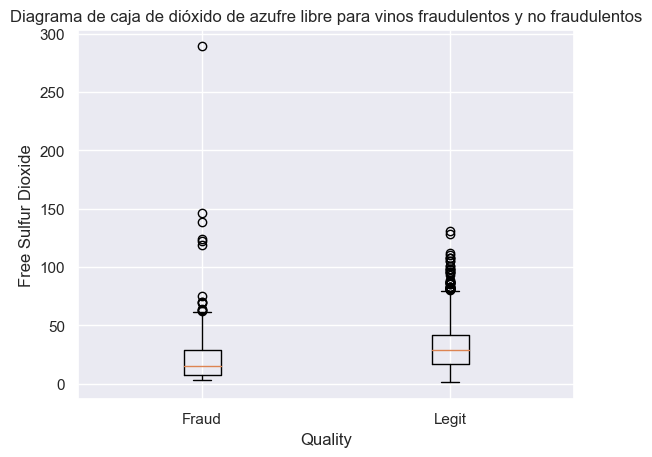

In [9]:
# Diagrama de caja que compara la cantidad de dióxido de azufre libre en los vinos con el vino fraudulento y no fraudulento

fraud_wines = data[data['quality'] == 'Fraud']
legit_wines = data[data['quality'] == 'Legit']

#total sulfur dioxide
plt.boxplot([fraud_wines['total sulfur dioxide'], legit_wines['total sulfur dioxide']])
plt.xticks([1, 2], ['Fraud', 'Legit'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Diagrama de caja de dióxido de azufre total para vinos fraudulentos y no fraudulentos')
plt.show()

#free sulfur dioxide
plt.boxplot([fraud_wines['free sulfur dioxide'], legit_wines['free sulfur dioxide']])
plt.xticks([1, 2], ['Fraud', 'Legit'])
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Diagrama de caja de dióxido de azufre libre para vinos fraudulentos y no fraudulentos')
plt.show()


<AxesSubplot: xlabel='type', ylabel='pH'>

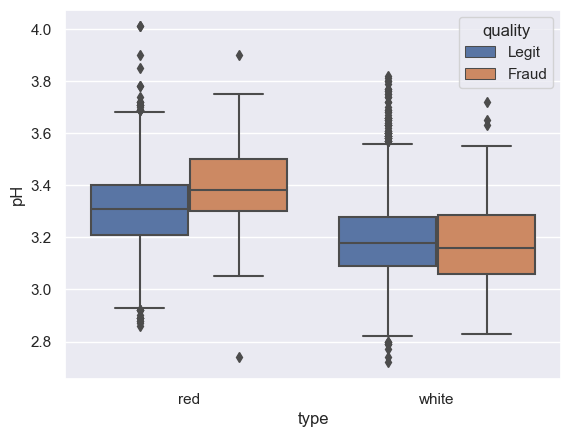

In [10]:
# Diagrama de caja que compara el pH de los vinos con el vino fraudulento y no fraudulentos

sns.boxplot(x='type', y='pH', hue='quality', data=data)

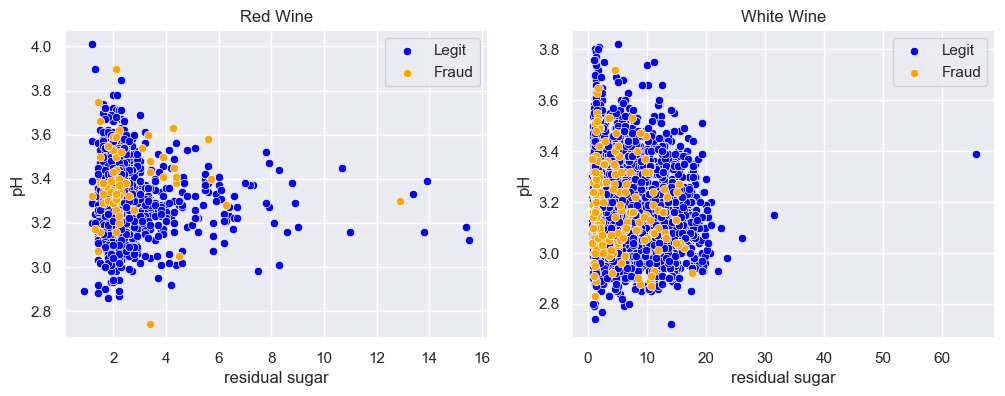

In [11]:
# Diagrama de dispersión que compara el ph contra el azúcar residual de los vinos con el vino fraudulento y no fraudulentos	


fraud_wines = data[data['quality'] == 'Fraud']
legit_wines = data[data['quality'] == 'Legit']

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# Red wine scatter plot
sns.scatterplot(ax=axes[0], data=legit_wines[legit_wines["type"]=="red"], x="residual sugar", y="pH", color="blue", label="Legit")
sns.scatterplot(ax=axes[0], data=fraud_wines[fraud_wines["type"]=="red"], x="residual sugar", y="pH", color="orange", label="Fraud")
axes[0].set(title="Red Wine")

# White wine scatter plot
sns.scatterplot(ax=axes[1], data=legit_wines[legit_wines["type"]=="white"], x="residual sugar", y="pH", color="blue", label="Legit")
sns.scatterplot(ax=axes[1], data=fraud_wines[fraud_wines["type"]=="white"], x="residual sugar", y="pH", color="orange", label="Fraud")
axes[1].set(title="White Wine")

plt.show()

### Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

In [12]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00


<AxesSubplot: >

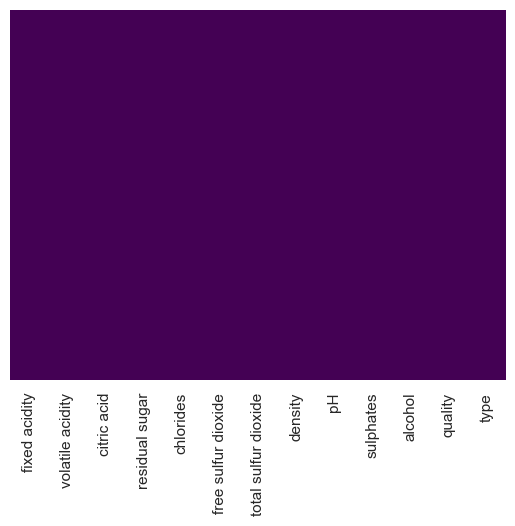

In [13]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

No hay datos nulos, por lo que no es neceario tomar acciones al respecto

### - Estudia las variables categóricas
### - Elabora gráficos de barra, tablas de frecuencia y de proporciones
### - Elabora gráficos adecuados según el tipo de dato que representan

Bar Plot of type


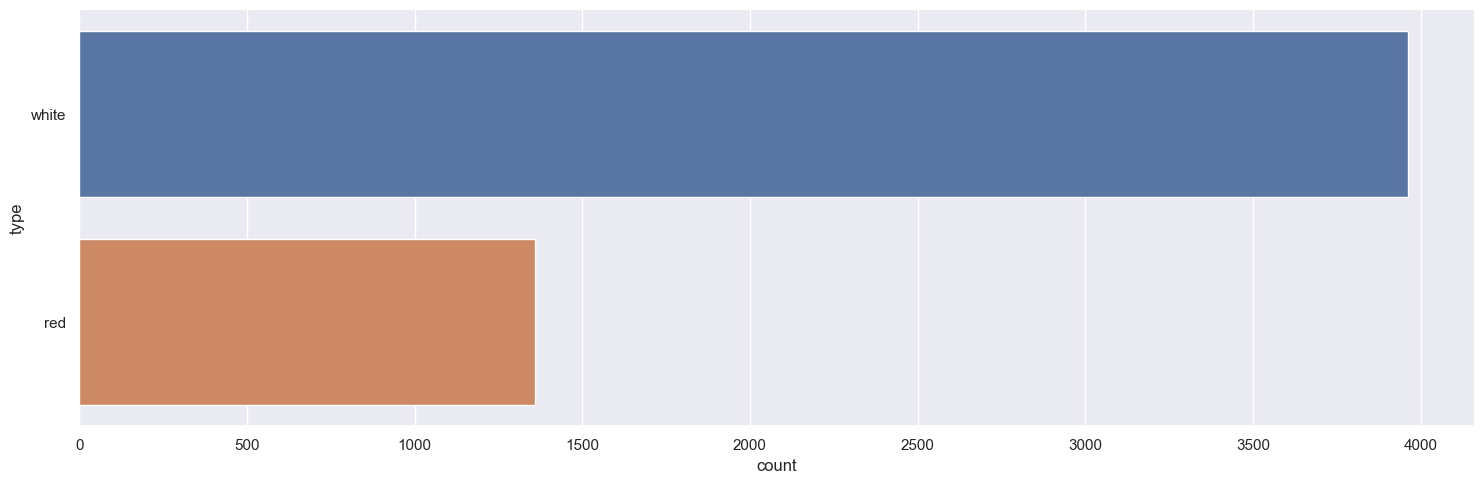

Summary of type
Bar Plot of quality


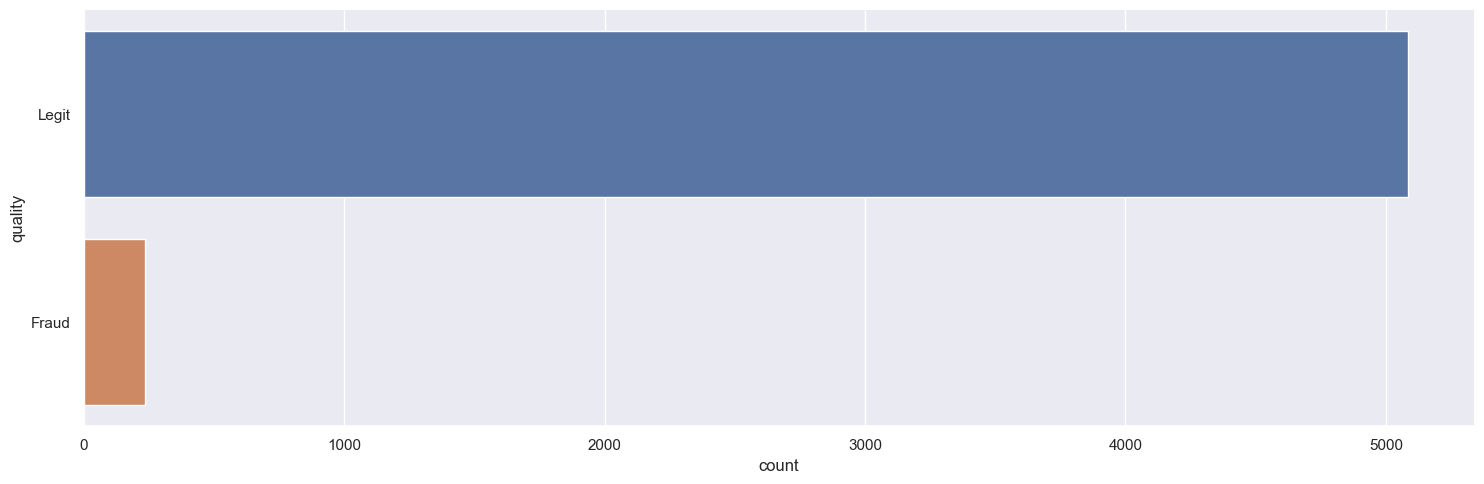

Summary of quality
Bar Plot of type with respect to quality


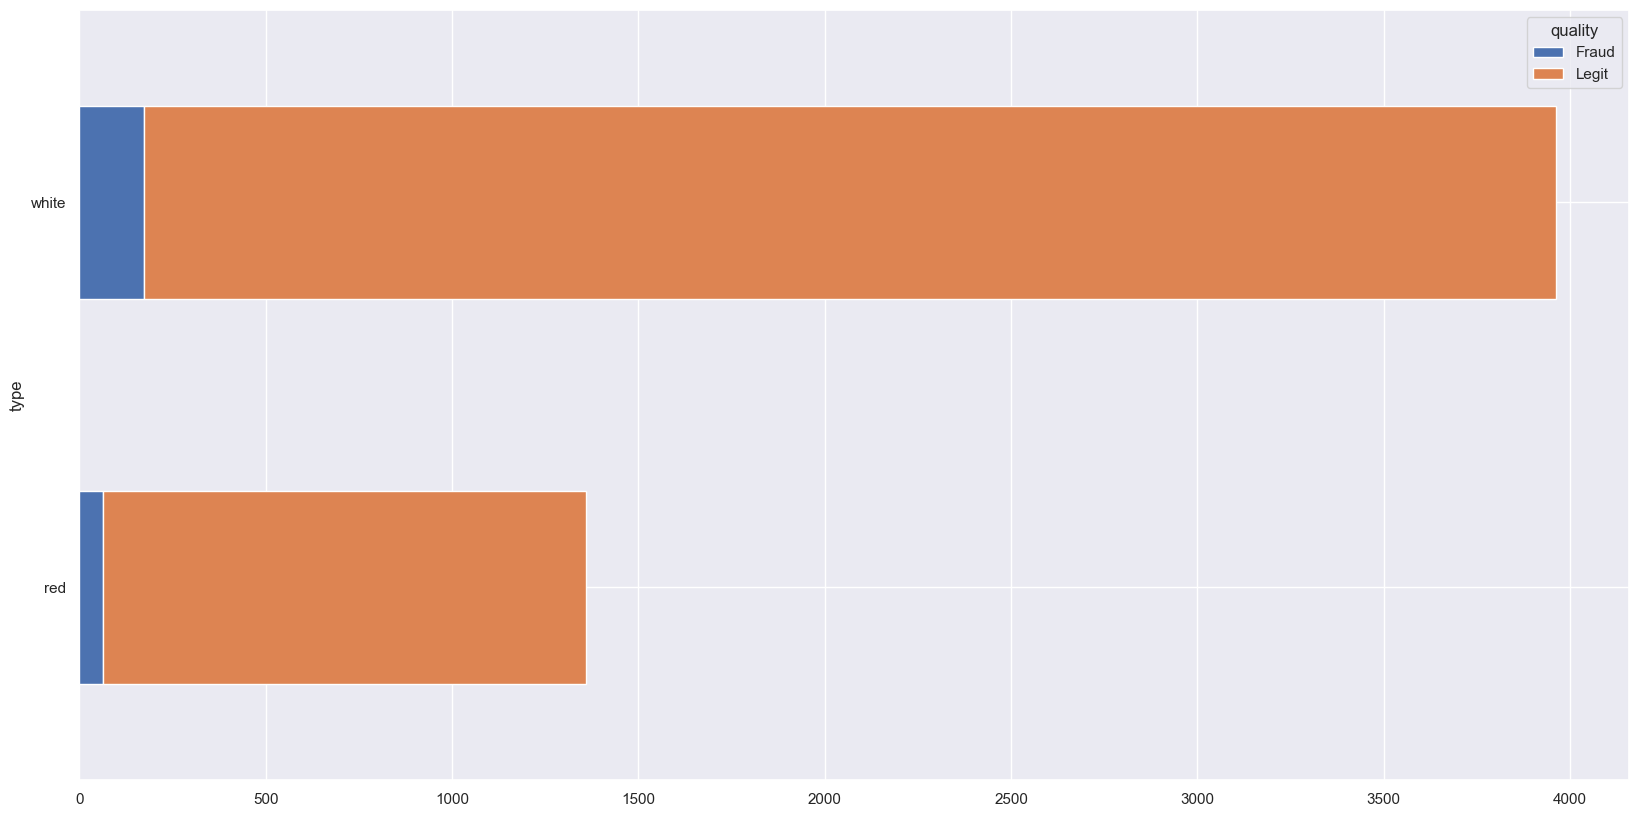

Crosstabulation of type across quality


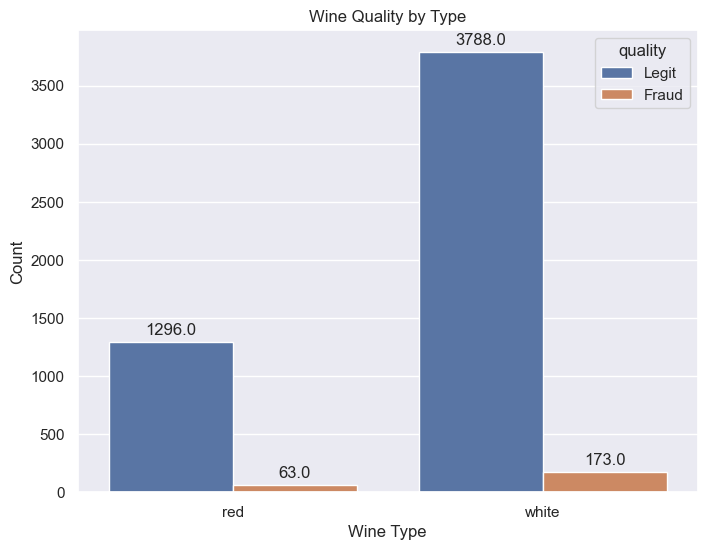

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Legit,red


In [23]:
eda_cat(data=data, x='type')
eda_cat(data=data, x='quality')
eda_cat(data=data, x='type', y='quality')

# Cantidad de vinos fraudulentos y no fraudulentos según el tipo de vino

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='type', hue='quality', data=data, ax=ax)
ax.set_title('Wine Quality by Type')
ax.set_xlabel('Wine Type')
ax.set_ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center')
    
# Show the plot
plt.show()
data.head()

In [15]:

# Crear la tabla de frecuencias con la variable type
freq_table = pd.crosstab(index=data['type'], columns="count")
print('Frecuencia de type')
freq_table



Frecuencia de type


col_0,count
type,
red,1599
white,4898


In [16]:
# Crear la tabla de frecuencias con la variable quality
freq_table = pd.crosstab(index=data['quality'], columns="count")
print('Frecuencia de quality')
freq_table


Frecuencia de quality


col_0,count
quality,
Fraud,246
Legit,6251


* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar 
modelos


In [17]:
# Limpiar los datos duplicados
data.drop_duplicates(inplace=True)
#data = pd.get_dummies(data, columns=['type', 'quality'])

data2 = data.copy()
#
#
#
data2['type'] = data2['type'].map({'red': 0, 'white': 1})
data2['quality'] = data2['quality'].map({'Legit': 0, 'Fraud': 1})
#
#data.head()
#data2.head()

# formato de la variable type y quality a numerico para poder usarlo en el modelo


data2.to_csv('wine_fraud_clean.csv', index=False)
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,0


**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar 
el de mejor rendimiento

In [19]:
# Load the clean_clean_dataset
clean_data = pd.read_csv('wine_fraud_clean.csv')

# Split the clean_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('type', axis=1), clean_data['type'], test_size=0.2, random_state=42)

# Train a Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)
rfc_precision = precision_score(y_test, rfc_y_pred, pos_label=1)
rfc_recall = recall_score(y_test, rfc_y_pred, pos_label=1)

# Train a SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
svm_precision = precision_score(y_test, svm_y_pred, pos_label=1)
svm_recall = recall_score(y_test, svm_y_pred, pos_label=1)

# Train a Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_precision = precision_score(y_test, lr_y_pred, pos_label=1)
lr_recall = recall_score(y_test, lr_y_pred, pos_label=1)

# Print the results
print("Random Forest: precision = {:.2f}, recall = {:.2f}".format(rfc_precision, rfc_recall))
print("SVM: precision = {:.2f}, recall = {:.2f}".format(svm_precision, svm_recall))
print("Logistic Regression: precision = {:.2f}, recall = {:.2f}".format(lr_precision, lr_recall))


Random Forest: precision = 1.00, recall = 1.00
SVM: precision = 0.99, recall = 0.99
Logistic Regression: precision = 0.99, recall = 0.99


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

